# Load Packages

In [1]:
using Printf, Statistics, StatsBase, Random, Distributions
include("jlFiles/printmat.jl")
Random.seed!(678)          #set the random number generator to this starting point

MersenneTwister(678)

In [2]:
using Plots

gr(size=(480,320))
default(fmt = :svg)

# Introduction

This notebook explores how autocorrelation ought to change how we test statistical hypotheses.

# AR(1) Series

The following function for simulating $T$ observations from an AR(1) series is coded.

$
y_t = (1-\rho)\mu + \rho y_{t-1} + \varepsilon_t \sigma
$, 
where $\varepsilon_t$ is the noise (N(0,1)), ρ is the parameter of the model and μ / σ are constants.

To make also the starting value ($y_0$) random, $T+100$ data points are simulated, and then the first 100 values of $y_t$ are discarded.

A single "sample" using `(T,ρ,σ,μ) = (500,0,3,2)` is generated and the average (mean) as well as the first 5 autocorrelations are computed. Then, the same is done a 2nd time, but with `ρ=0.75`.

In [3]:
function SimAR1(T,ρ,σ,μ)              # Where T: Length of data series, ρ: Parameter of the model, σ and μ: Constants

    y_t = zeros(T+100,1)              # Generate vector of length T+100 consisting of zeros
    ε = rand(Normal(0,1), T+100)      # Generate error terms

    for t = 2:T+100                   # Generate T+100 observations from an AR(1) series
        y_t[t] = (1-ρ) * μ + ρ * y_t[t-1] + ε[t] * σ
    end

    y_t = y_t[101:end]               # Cut of the first 100 observations from the data series

    return y_t                       # Retrun data series of length T
end

SimAR1 (generic function with 1 method)

In [4]:
(T,ρ,σ,μ) = (500,0,3,2)              # Define first set of parameters
y = SimAR1(T,ρ,σ,μ)                  # Obtain AR(1) series

print("average from one sample with ρ=0")
printmat(mean(y))                    # Compute and report the mean of the sample
print("autocorrelations with ρ=0\n")
printmat(autocor(y, collect(1:5)), rowNames=[1,2,3,4,5])   # Compute and report the first five autocorrelation

average from one sample with ρ=0     1.860



autocorrelations with ρ=0


1     0.005
2    -0.012
3     0.024
4     0.057
5     0.074



In [5]:
(T,ρ,σ,μ) = (500,0.75,3,2)             # Define second set of parameters
y = SimAR1(T,ρ,σ,μ)                    # Run function and return generated AR(1) series

print("average from one sample with ρ=0.75")
printmat(mean(y))                      # Compute and report the mean of the sample
print("autocorrelations with ρ=0.75\n")
printmat(autocor(y, collect(1:5)), rowNames=[1,2,3,4,5])   # Compute and report the first five autocorrelation

average from one sample with ρ=0.75     2.098

autocorrelations with ρ=0.75
1     0.734
2     0.552
3     0.373
4     0.236
5     0.148



# Monte Carlo Simulation

A Monte Carlo simulation is performed with the parameters `(T,ρ,σ,μ) = (500,0,3,2)`.

1. A sample with $T$ observations is generated and the average is calculated. This process is repeated $M=10,000$ times and the estimated averages are stored in a vector of length $M$. (In the following the symbol $\mu_i$ to denote the average from sample $i$ is used.)

2. The average $\mu_i$ across the $M$ estimates is computed? ($\frac{1}{M}\sum\nolimits_{i=1}^{M}\mu_i$)

3. The standard deviation of $\mu_i$ across the $M$ estimates is computed and compared with the theoretical standard deviation.

4. The distribution of $\mu_i$ is plotted in a histogram and compared with the theoretical pdf.


In [6]:
function MC_Sim(T,ρ,σ,μ,M,T_th)               # Where M: number of simulations,
                                              # T_th: Length of data series for theoretical calculation
    μ_i = zeros(M)                            # Initialize array for estimated averages

    for i = 1:M                               # Run M simulations and store the corresponding average in vector μ_i
        μ_i[i] = mean(SimAR1(T,ρ,σ,μ))
    end

    μ_M = mean(μ_i)                           # Compute average across M estimates
    σ_M = std(μ_i)                            # Compute standard deviation across M estimates

    s = std(SimAR1(T_th,ρ,σ,μ))/sqrt(T)

    return μ_i, μ_M, σ_M, s
end

MC_Sim (generic function with 1 method)

In [7]:
# Set parameters
(T,ρ,σ,μ,M,T_th) = (500,0,3,2,10_000,10_000)

# Extract values from function
μ_i, μ_M, σ_M, s = MC_Sim(T,ρ,σ,μ,M,T_th)

# Output results
printmat("Average across the simulations", μ_M)
print("Std across the samples (with ρ=0) and in theory:\n")
printmat([σ_M s], colNames=["simulations" "theory"])

Average across the simulations     2.001

Std across the samples (with ρ=0) and in theory:
simulations    theory
     0.136     0.134


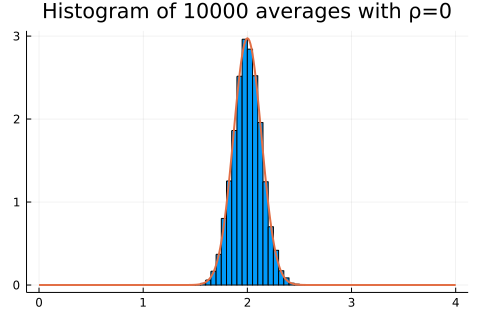

In [8]:
xGrid = 0:0.01:4
pdfX = pdf.(Normal(μ_M, s), xGrid)

# Histogram and theoretical pdf
histogram(μ_i,
          bins=20,
          normalized=true,
          legend=false,
          title="Histogram of 10000 averages with ρ=0")

plot!(xGrid, pdfX, linewidth=2)

The same will be done with `ρ=0.75` (the other parameters are unchanged).

In [9]:
# Set parameters
(T,ρ,σ,μ,M,T_th) = (500,0.75,3,2,10_000,10_000)

# Extract values from function
μ_i, μ_M, σ_M, s = MC_Sim(T,ρ,σ,μ,M,T_th)

# Output results
printmat("Average across the simulations", μ_M)
print("Std across the samples (with ρ=0.75) and in theory:\n")
printmat([σ_M s], colNames=["simulations" "theory"])

Average across the simulations     1.997

Std across the samples (with ρ=0.75) and in theory:
simulations    theory
     0.527     0.201



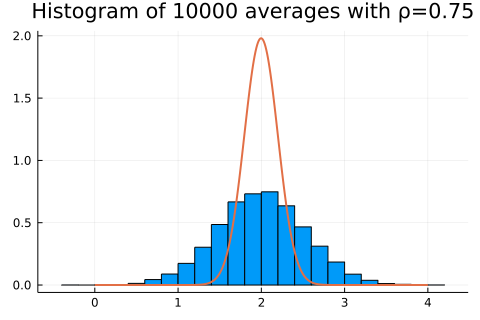

In [10]:
xGrid = 0:0.01:4
pdfX = pdf.(Normal(μ_M, s), xGrid)

# Histogram and theoretical pdf
histogram(μ_i, 
          bins=30,
          normalized=true,
          legend=false,
          title="Histogram of 10000 averages with ρ=0.75")

plot!(xGrid, pdfX, linewidth=2)

# Hypothesis Testing

The hypothesis that $\mu=2$ is tested. The decision rule is 

- reject the hypothesis if $|(\mu_i-2)/s|>1.645$ with $s=\sigma_y/\sqrt{T}$

With this decision rule, we are clearly assuming that the theoretical result (definition of $s$) is correct.

$\mu_i$ and $\sigma_y$ are computed from each sample.

The fractions of the $M$ simulations where the hypothesis is rejected when ρ = 0 and when ρ = 0.75 are reproted. For the other parameters `(T,σ,μ) = (500,3,2)` are used as before.

In [11]:
# Set parameter
ρ_1 = 0
ρ_2 = 0.75
α = 1.645
(T,σ,μ) = (500,3,2)
M = 10_000
μ_i = zeros(M,2)
σ_i = zeros(M,2)
countS = countB = 0

# Test hypothesis for ρ=0 and ρ=0.75
for i = 1:M
    y_ρS = SimAR1(T,ρ_1,σ,μ)
    y_ρB = SimAR1(T,ρ_2,σ,μ)

    μ_i[i,1] = mean(y_ρS)
    σ_i[i,1] = std(y_ρS)

    μ_i[i,2] = mean(y_ρB)
    σ_i[i,2] = std(y_ρB)

    if abs((μ_i[i,1] - 2)/(σ_i[i,1] / sqrt(T))) > α
        countS += 1
    end

    if abs((μ_i[i,2] - 2)/(σ_i[i,2] / sqrt(T))) > α
        countB += 1
    end
end

# Print results
print("Frequency of rejections:\n")
printmat([countS/M countB/M], colNames=["with ρ=0", "with ρ=0.75"])

Frequency of rejections:
  with ρ=0with ρ=0.75
     0.107     0.532
